# Imports

In [126]:
import numpy             as np
import pandas            as pd
import seaborn           as sns
import plotly.express    as px
import matplotlib.pyplot as plt
import ipywidgets        as widgets

from matplotlib.pyplot     import figure
from matplotlib.pyplot     import plot
from IPython.core.display  import HTML
from geopy.geocoders       import Nominatim
from tabulate              import tabulate
from geopy                 import distance
from geopy.distance        import great_circle
from ipywidgets            import fixed

## Helper Functions

In [127]:
def jupyter_settings():
    %matplotlib inline
        
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = (20,15)
    plt.rcParams['font.size'] = 20
        
    display( HTML( '<style>.container { width:90% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.options.display.float_format = '{:,.2f}'.format
    pd.set_option( 'display.expand_frame_repr', False)        
            
    sns.set()
    sns.set_theme(style ='darkgrid', font_scale=2)
    #sns.set_style("darkgrid")


In [128]:
jupyter_settings()

## Loading Data

In [129]:
df_raw = pd.read_csv(r'../datasets/raw/kc_house_data.csv')

In [130]:
df1=df_raw.copy()

# Data Description

In [131]:
df1=df_raw.copy()

## Rename Columns

In [132]:
# checking columns names
print(df1.columns)

# renaming 'price' to 'buying_price'
df1 = df1.rename(columns={"price": "buying_price"})

df1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


Index(['id', 'date', 'buying_price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Data Types

In [133]:
print(df1.dtypes)
df1.head()

id                 int64
date              object
buying_price     float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


,id,date,buying_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,"221,900.00",3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,"538,000.00",3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,"180,000.00",2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,"604,000.00",4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,"510,000.00",3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


## Data Dimension

In [134]:
print('Number of rows: {}' .format (df1.shape[0]))
print('Number of columns: {}' .format (df1.shape[1]))

Number of rows: 21613
Number of columns: 21


## Check NA

In [135]:
df1.isna().sum()

id               0
date             0
buying_price     0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Fill out NA

## Change Variables Types

In [136]:
# changing 'date' type from OBJECT to DATE or INT

# checking DATES types
print(df1[['date','yr_built','yr_renovated']].head(),'\n')
print(df1[['date','yr_built','yr_renovated']].dtypes)

# changing dtypes
df1['date']         = pd.to_datetime(df1['date'],         format='%Y-%m-%d')
# df1['yr_built']     = pd.to_datetime(df1['yr_built'],     format='%Y-%m-%d')
# df1['yr_renovated'] = pd.to_datetime(df1['yr_renovated'], format='%Y-%m-%d')

# checking DATES types
print("")
print(df1[['date','yr_built','yr_renovated']].dtypes)
df1[['date','yr_built','yr_renovated']].head()

              date  yr_built  yr_renovated
0  20141013T000000      1955             0
1  20141209T000000      1951          1991
2  20150225T000000      1933             0
3  20141209T000000      1965             0
4  20150218T000000      1987             0 

date            object
yr_built         int64
yr_renovated     int64
dtype: object

date            datetime64[ns]
yr_built                 int64
yr_renovated             int64
dtype: object


,date,yr_built,yr_renovated
0,2014-10-13,1955,0
1,2014-12-09,1951,1991
2,2015-02-25,1933,0
3,2014-12-09,1965,0
4,2015-02-18,1987,0


## Dropping Duplicates 

In [137]:
print(df1.shape[0], 'number of rows')
print(df1['id'].unique().shape[0], 'uniques ids')
print(df1.shape[0] - df1['id'].unique().shape[0], '  number of duplicated ids')

21613 number of rows
21436 uniques ids
177   number of duplicated ids


In [138]:
# sorting dataframe by date
df1 = df1.sort_values('date', ascending=True)

# deleting ids that appears first
df1 = df1.drop_duplicates(subset='id', keep='last')

print('new shape:', df1.shape)

new shape: (21436, 21)


## Descriptive Statistics

In [139]:
num_df1 = df1.select_dtypes(include=['int64','float64'])
cat_df1 = df1.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

### Numerical Attributes

In [140]:
num_df1.shape

(21436, 20)

In [141]:
# central tendendy - mean, median
ct1 = pd.DataFrame(num_df1.apply(np.mean)).T
ct2 = pd.DataFrame(num_df1.apply(np.median)).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_df1.apply(np.std)).T
d2 = pd.DataFrame(num_df1.apply(min)).T
d3 = pd.DataFrame(num_df1.apply(max)).T
d4 = pd.DataFrame(num_df1.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_df1.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_df1.apply(lambda x: x.kurtosis)).T

# concatenate 
m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,"1,000,102.0","9,900,000,190.0","9,899,000,088.0","4,580,765,328.18","3,904,921,185.0","2,876,522,535.73",0.24,<bound method NDFrame._add_numeric_operations....
1,buying_price,"75,000.0","7,700,000.0","7,625,000.0","541,649.96","450,000.0","367,306.36",4.04,<bound method NDFrame._add_numeric_operations....
2,bedrooms,0.0,33.0,33.0,3.37,3.0,0.93,1.99,<bound method NDFrame._add_numeric_operations....
3,bathrooms,0.0,8.0,8.0,2.12,2.25,0.77,0.51,<bound method NDFrame._add_numeric_operations....
4,sqft_living,290.0,"13,540.0","13,250.0","2,082.7","1,920.0",919.13,1.47,<bound method NDFrame._add_numeric_operations....
5,sqft_lot,520.0,"1,651,359.0","1,650,839.0","15,135.64","7,614.0","41,537.65",13.04,<bound method NDFrame._add_numeric_operations....
6,floors,1.0,3.5,2.5,1.5,1.5,0.54,0.61,<bound method NDFrame._add_numeric_operations....
7,waterfront,0.0,1.0,1.0,0.01,0.0,0.09,11.34,<bound method NDFrame._add_numeric_operations....
8,view,0.0,4.0,4.0,0.24,0.0,0.77,3.39,<bound method NDFrame._add_numeric_operations....
9,condition,1.0,5.0,4.0,3.41,3.0,0.65,1.04,<bound method NDFrame._add_numeric_operations....


### Categorical Attributes

In [142]:
cat_df1.shape # no attributes

(21436, 0)

# Variable Filtering 

In [143]:
df2=df1.copy()

In [144]:
df2 = df2.drop (['view', 'sqft_living15','sqft_lot15'], axis=1)


# view          	An index from 0 to 4 of how good the view of the property was

# sqft_living15 	The square footage of interior housing living space for the nearest 15 neighbors
# sqft_lot15    	The square footage of the land lots of the nearest 15 neighbors

In [145]:
# checking properties 'sqft_living' by number of bedrooms
print(df2[['bedrooms','sqft_living']].groupby(['bedrooms']).mean().sort_values('sqft_living', ascending=True))
print(df2[['id','bedrooms']].groupby(['bedrooms']).count(),'\n')

df2 = df2[ (df2['bedrooms']!=0) & (df2['bedrooms']!=11) & (df2['bedrooms']!=33) ]

          sqft_living
bedrooms             
1              884.94
2            1,240.54
33           1,620.00
0            1,707.85
3            1,807.60
4            2,556.00
11           3,000.00
5            3,054.82
6            3,310.76
10           3,706.67
9            3,775.00
8            3,800.00
7            3,974.21
            id
bedrooms      
0           13
1          194
2         2736
3         9731
4         6849
5         1586
6          265
7           38
8           13
9            6
10           3
11           1
33           1 



# Feature Engineering

In [430]:
df3 = df2.copy()

## <font color ='red'>Mind Map Hypothesis

## Creating Hypothesis

1. Properties that have water view are 50% more expensive.
2. Properties with basements have higher grade.
3. Properties with basements have bigger interior living space.
4. Properties with basements are 15% more expensive.
5. Properties built with basements decreased over the years.
6. Properties with 1 to 2 bathrooms are 20% more expensive than those with up to 1 bathroom.
7. Properties with 3 bedrooms are 25% more expensive than those which have 2 bedrooms.
8.  Properties with 2 floors are 15% more expensive than those with 1 floor.
9. Most properties (+50%) became available during summer/spring.
10. Properties available during summer/spring are 20% more expensive.
11. Most properties (+50%) are localized in a 15km radio from the lake.
12. Most of properties (+50%) that should be bought are in a 15km radius from the lake.
13. Properties selected to be bought that are localized in a 15km radius from lake correspond to more than 50% of expected profit.
14. Properties have bigger interior living space along construction year timeline.
15. Properties that were not renovated are 40% cheaper.

## <font color ='red'>Features Creation
    get api data

In [431]:
# get data from API in separate dataframe

# # query
# df3['query'] = df3[['lat','long']].apply(lambda x: str(x['lat']) + ',' + str(x['long']), axis=1)
# df_geodata = df3[['id', 'query']].copy()

# # creating empty columns
# df_geodata['place_id']      = "NA"
# df_geodata['house_number']  = 'NA'
# df_geodata['road']          = 'NA'
# df_geodata['neighbourhood'] = 'NA'
# df_geodata['city']          = 'NA'
# df_geodata['county']        = 'NA'
# df_geodata['state']         = 'NA'
# df_geodata['postcode']      ='NA'


# # auxiliar variable that helps localizing the adresses
# geolocator = Nominatim (user_agent = 'api') 

# # loop for
# for i in range (df_geodata.shape[0]):
    
#     print ('Loop: {} / {}'.format(i, df_geodata.shape[0]))
    
#     # api request
#     response = geolocator.reverse(query) # standard variable for API responses // 'reverse' returns an address by location point
    
#     # populating data
#     if 'place_id'in response.raw:
#         df_geodata.loc[i, 'place_id']      = response.raw['place_id']
#     if 'house_number'in response.raw['address']:
#         df_geodata.loc[i, 'house_number']  = response.raw['address']['house_number']
#     if 'road'in response.raw['address']:
#         df_geodata.loc[i, 'road']          = response.raw['address']['road']
#     if 'neighbourhood'in response.raw['address']:
#         df_geodata.loc[i, 'neighbourhood'] = response.raw['address']['neighbourhood']
#     if 'city'in response.raw['address']:
#         df_geodata.loc[i, 'city']          = response.raw['address']['city']
#     if 'county'in response.raw['address']:
#         df_geodata.loc[i,'county']         = response.raw['address']['county']
#     if 'state'in response.raw['address']:
#         df_geodata.loc[i,'state']          = response.raw['address']['state']
#     if 'postcode'in response.raw['address']:
#         df_geodata.loc[i,'postcode']       = response.raw['address']['postcode']


In [432]:
# getting geodata temporarily
df_geodata = pd.read_csv('../datasets/interim/api_geodata.csv')

# merging df_geodata with df3
df3 = pd.merge(df3, df_geodata, how='left', on='id')
df3.head()

# saving df_geodata
df_geodata.to_csv('../datasets/interim/api_geodata_realstate.csv')

df3.head()

,id,date,buying_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,query,road,house_number,neighbourhood,city,county,state
0,5561000190,2014-05-02,"437,500.00",3,2.25,1970,35100,2.00,0,4,9,1970,0,1977,0,98027,47.46,-121.99,"47.4635,-121.991",Southeast 154th Street,26069,NaN,NaN,King County,Washington
1,472000620,2014-05-02,"790,000.00",3,2.50,2600,4750,1.00,0,4,9,1700,900,1951,0,98117,47.68,-122.40,"47.6833,-122.4",34th Avenue Northwest,7506,Sunset Hill,Seattle,King County,Washington
2,1024069009,2014-05-02,"675,000.00",5,2.50,2820,67518,2.00,0,3,8,2820,0,1979,0,98029,47.58,-122.03,"47.5794,-122.025",Southeast 32nd Way,23601,NaN,NaN,King County,Washington
3,7853361370,2014-05-02,"555,000.00",4,2.50,3310,6500,2.00,0,3,8,3310,0,2012,0,98065,47.52,-121.87,"47.515,-121.87",Southeast Terrace Street,35246,NaN,NaN,King County,Washington
4,5056500260,2014-05-02,"440,000.00",4,2.25,2160,8119,1.00,0,3,8,1080,1080,1966,0,98006,47.54,-122.18,"47.5443,-122.177",Southeast 65th Street,12201,NaN,Bellevue,King County,Washington


In [433]:
# radius from lake

# lake infos
lake_center = [{'lat':47.640883, 'long':-122.259250}]  
lake_tuple = 47.640883, -122.259250 

# distance from Lake
df3['dist_fromlake'] = df3['query'].apply(lambda x: great_circle(lake_tuple, x).km)

df3[['query','dist_fromlake']].sample(5) 

,query,dist_fromlake
3190,"47.4858,-122.185",18.12
8032,"47.7296,-122.241",9.96
10903,"47.6487,-122.079",13.53
1052,"47.6277,-122.345",6.59
17748,"47.7471,-122.324",12.77


In [434]:
# median buying price by zipcode
a = df3[['buying_price','zipcode']].groupby('zipcode').median().reset_index().rename(columns={'buying_price': 'median_price_zipcode'})
a.head()

df3 = pd.merge(df3, a, on='zipcode', how='left')
df3[['id', 'buying_price', 'zipcode', 'median_price_zipcode']].sample(5)

,id,buying_price,zipcode,median_price_zipcode
13372,326069101,"515,000.00",98077,"652,475.00"
14307,8663310010,"455,000.00",98034,"446,000.00"
5505,6661200320,"163,500.00",98038,"342,500.00"
1942,3783100080,"261,000.00",98042,"291,500.00"
19663,2688100071,"500,000.00",98117,"545,000.00"


In [435]:
# decision: to buy x not to buy

df3['decision'] = df3[['buying_price', 'median_price_zipcode', 'condition']].apply(lambda x: 1 if ((x['buying_price'] <= x['median_price_zipcode']) & (x['condition']>=3))
                                                                                        else 0, axis=1)
                                                                        
                                                             
df3[['id', 'zipcode', 'buying_price', 'median_price_zipcode', 'condition', 'decision']].sample(5)

,id,zipcode,buying_price,median_price_zipcode,condition,decision
5375,9542000030,98005,"835,100.00","765,475.00",4,0
16729,2222059052,98042,"370,950.00","291,500.00",3,0
12978,6762700376,98102,"650,000.00","710,000.00",3,1
18649,7971300020,98005,"800,000.00","765,475.00",4,0
21486,3333000655,98118,"334,000.00","370,000.00",3,1


In [436]:
# selling price suggestion

df3['selling_price_suggestion'] = df3[['buying_price', 'median_price_zipcode', 'condition']].apply(lambda x: x['buying_price']*1.3 if ((x['buying_price'] <= x['median_price_zipcode']) & (x['condition']>=3))
                                                                                                        else 0, axis=1)

df3[['id', 'zipcode', 'buying_price', 'median_price_zipcode', 'condition', 'decision', 'selling_price_suggestion']].sample(5)

,id,zipcode,buying_price,median_price_zipcode,condition,decision,selling_price_suggestion
12172,723049156,98146,"284,700.00","309,500.00",3,1,"370,110.00"
16551,2021200530,98199,"1,110,000.00","690,000.00",3,0,0.00
21525,9136103130,98103,"685,000.00","550,000.00",3,0,0.00
1702,7701930010,98058,"489,000.00","335,000.00",3,0,0.00
8745,9485951510,98042,"450,000.00","291,500.00",4,0,0.00


In [437]:
# expected profit

df3['expected_profit'] = df3[['buying_price', 'selling_price_suggestion']].apply(lambda x: 0 if x['selling_price_suggestion']==0
                                                                                        else (x['selling_price_suggestion'] - x['buying_price']), axis=1) 

df3[['id', 'zipcode', 'buying_price', 'median_price_zipcode', 'condition', 'decision', 'selling_price_suggestion', 'expected_profit']].sample(5)

,id,zipcode,buying_price,median_price_zipcode,condition,decision,selling_price_suggestion,expected_profit
19583,5412400170,98030,"259,000.00","282,755.00",3,1,"336,700.00","77,700.00"
12097,6817850040,98074,"825,000.00","644,500.00",3,0,0.00,0.00
2390,9238900616,98136,"680,000.00","489,950.00",4,0,0.00,0.00
11813,4457300135,98040,"741,000.00","993,750.00",3,1,"963,300.00","222,300.00"
11145,8644000060,98198,"237,000.00","266,125.00",4,1,"308,100.00","71,100.00"


In [438]:
# seasons of the year

def season_from_date(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'autumn': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'

df3['season'] = df3['date'].map(season_from_date)
df3[['date','season']].head()

,date,season
0,2014-05-02,spring
1,2014-05-02,spring
2,2014-05-02,spring
3,2014-05-02,spring
4,2014-05-02,spring


In [439]:
# median buying price by zipcode and season

# grouping by zipcode and median price by season
a = df3[['buying_price','zipcode','season']].groupby(['zipcode', 'season']).median().reset_index()
a.head(10)

b = a.pivot(index='zipcode', columns='season', values='buying_price').reset_index()
b = b.rename(columns={'autumn':'med_autumn', 'spring':'med_spring', 'summer':'med_summer', 'winter':'med_winter'})
b.head()

# merging with df3
df3 = pd.merge(df3, b, on='zipcode', how='left')
df3.head()

# sample
df3[['id', 'buying_price', 'zipcode', 'median_price_zipcode', 'med_autumn', 'med_spring', 'med_summer', 'med_winter']].sample(5)

,id,buying_price,zipcode,median_price_zipcode,med_autumn,med_spring,med_summer,med_winter
12498,7974200777,"531,000.00",98115,"570,000.00","552,500.00","595,000.00","550,000.00","580,000.00"
21245,806800090,"275,000.00",98092,"309,780.00","312,500.00","323,000.00","303,975.00","298,900.00"
18435,3668000670,"200,000.00",98092,"309,780.00","312,500.00","323,000.00","303,975.00","298,900.00"
321,9545230280,"560,000.00",98027,"570,500.00","545,000.00","574,950.00","575,000.00","538,100.00"
13677,2771101921,"377,000.00",98199,"690,000.00","650,000.00","730,000.00","735,000.00","606,000.00"


In [440]:
# best season to sell

df3['season_to_sell'] = ''


# defining best season to sell accorgding to avg price for each season
for i in range (df3.shape[0]):
    cols = ['med_autumn', 'med_spring', 'med_summer', 'med_winter']
    
    if df3.loc[i, 'decision']!=0:
    
        if df3.loc[i, cols[0]] >= df3.loc[i,'buying_price']:
            df3.loc[i, 'season_to_sell'] = df3.loc[i, 'season_to_sell'] + 'autumn '
        if df3.loc[i, cols[1]] >= df3.loc[i,'buying_price']:
            df3.loc[i, 'season_to_sell'] = df3.loc[i, 'season_to_sell'] + 'spring '
        if df3.loc[i, cols[2]] >= df3.loc[i,'buying_price']:
            df3.loc[i, 'season_to_sell'] = df3.loc[i, 'season_to_sell'] + 'summer '
        if df3.loc[i, cols[3]] >= df3.loc[i,'buying_price']:
            df3.loc[i, 'season_to_sell'] = df3.loc[i, 'season_to_sell'] + 'winter '
        


df3[['id', 'buying_price', 'zipcode', 'median_price_zipcode', 'med_autumn', 'med_spring', 'med_summer', 'med_winter', 'decision', 'season_to_sell']].head()

,id,buying_price,zipcode,median_price_zipcode,med_autumn,med_spring,med_summer,med_winter,decision,season_to_sell
0,5561000190,"437,500.00",98027,"570,500.00","545,000.00","574,950.00","575,000.00","538,100.00",1,autumn spring summer winter
1,472000620,"790,000.00",98117,"545,000.00","535,000.00","545,000.00","545,000.00","555,000.00",0,
2,1024069009,"675,000.00",98029,"575,000.00","575,000.00","592,500.00","561,000.00","560,000.00",0,
3,7853361370,"555,000.00",98065,"502,500.00","452,250.00","516,000.00","485,000.00","528,750.00",0,
4,5056500260,"440,000.00",98006,"762,684.50","765,000.00","755,000.00","760,000.00","791,270.50",1,autumn spring summer winter


# <font color ='red'>EDA

In [441]:
df4=df3.copy()

In [442]:
num_df4 = df4.select_dtypes(include=['int64','float64'])
cat_df4 = df4.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

## <font color ='red'>Univariate Analysis
    

### <font color ='red'> Response Variable (gráfico de sobreposto)

In [443]:
aux1 = df4[df4['expected_profit']!=0][['id', 'expected_profit']].copy()

bin_groups = list(np.arange(0,635000,5000)) # maximum profit = 630,000.00
aux1['expected_profit_binned'] = pd.cut(aux1['expected_profit'], bins=bin_groups)

aux1.head()

,id,expected_profit,expected_profit_binned
0,5561000190,"131,250.00","(130000, 135000]"
4,5056500260,"132,000.00","(130000, 135000]"
5,3438501320,"88,500.00","(85000, 90000]"
6,1737320120,"141,000.00","(140000, 145000]"
7,7197300105,"165,000.00","(160000, 165000]"


In [444]:
# grouping in bins the number of properties ('id_') and sum of 'expected_profit'
a1 = ( aux1.groupby('expected_profit_binned').agg(properties      = ('id', 'count'),
                                                  expected_profit = ('expected_profit', 'sum')) ).reset_index()


a1.head()

,expected_profit_binned,properties,expected_profit
0,"(0, 5000]",0,0.00
1,"(5000, 10000]",0,0.00
2,"(10000, 15000]",0,0.00
3,"(15000, 20000]",0,0.00
4,"(20000, 25000]",2,"47,400.00"


In [445]:
# sorting by number of 'id_'
a1.sort_values('properties', ascending=False).head()

,expected_profit_binned,properties,expected_profit
14,"(70000, 75000]",652,"47,533,093.50"
15,"(75000, 80000]",542,"42,085,093.50"
17,"(85000, 90000]",512,"44,989,732.50"
16,"(80000, 85000]",509,"41,938,583.10"
20,"(100000, 105000]",494,"50,809,767.30"


In [446]:
# sorting by 'expected_profit'
a1.sort_values('expected_profit', ascending=False).head()

,expected_profit_binned,properties,expected_profit
26,"(130000, 135000]",455,"60,389,562.90"
32,"(160000, 165000]",346,"56,425,349.10"
29,"(145000, 150000]",372,"55,081,720.50"
23,"(115000, 120000]",451,"53,225,628.60"
20,"(100000, 105000]",494,"50,809,767.30"


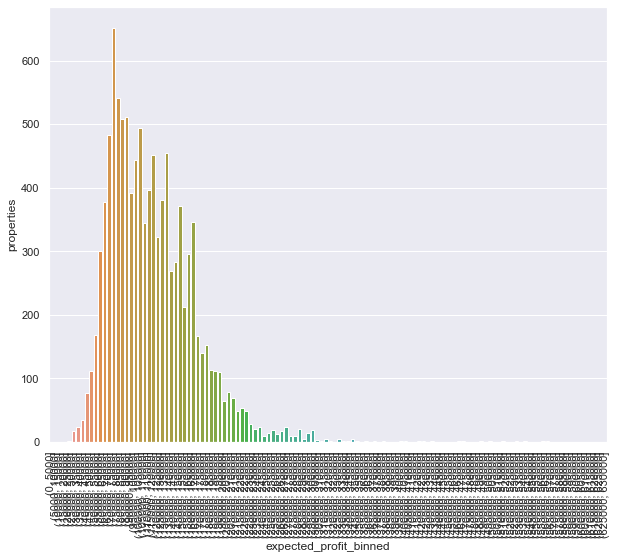

In [447]:
# id_distribution
sns.barplot(data=a1, x='expected_profit_binned', y='properties');
plt.xticks(rotation=90);

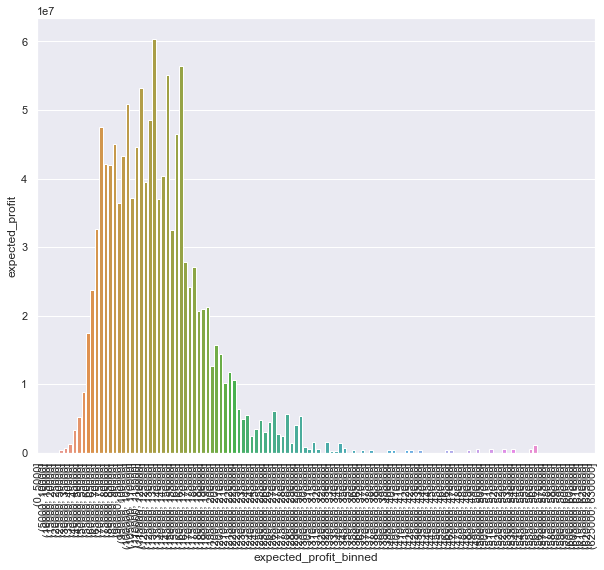

In [448]:
# profit_distribution
sns.barplot(data=a1, x='expected_profit_binned', y='expected_profit');
plt.xticks(rotation=90);

<font color = 'red '> # ======== comparision tests

In [449]:
#https://seaborn.pydata.org/generated/seaborn.lineplot.html

In [450]:
#https://seaborn.pydata.org/tutorial/axis_grids.html

In [451]:
# plt.bar(range(len(df2)), df2.Range2.values, tick_label=df2.Range2.index.values)

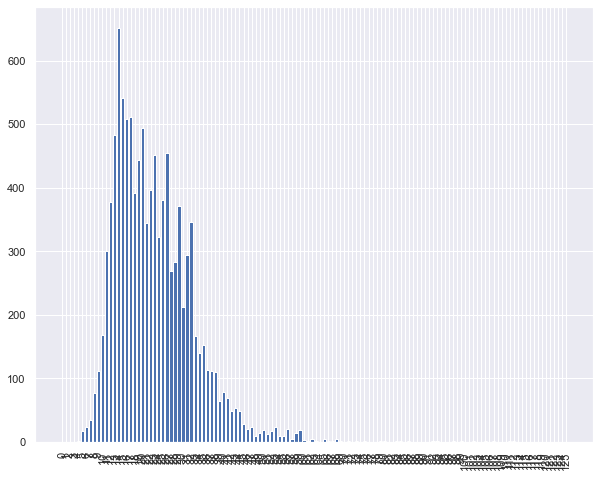

In [452]:
plt.bar(range(len(a1)), a1['properties'] , tick_label= a1['expected_profit_binned'].index.values)
plt.xticks(rotation=90);

C:\Users\Mariana\Documents\anaconda3\envs\pythonDS\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'

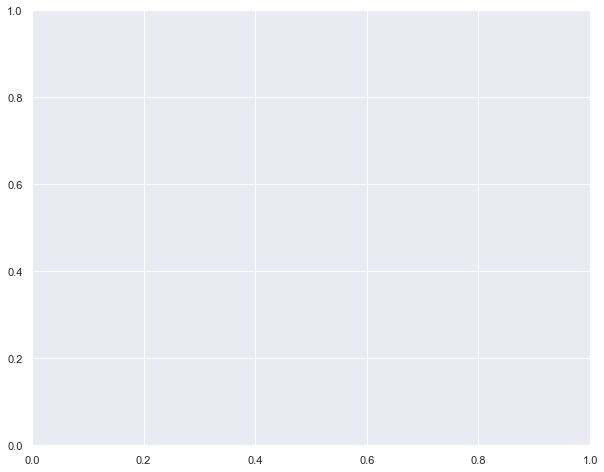

In [453]:
sns.distplot(a1['expected_profit_binned'].values, a1['properties'])

AttributeError: 'AxesSubplot' object has no attribute 'displot'

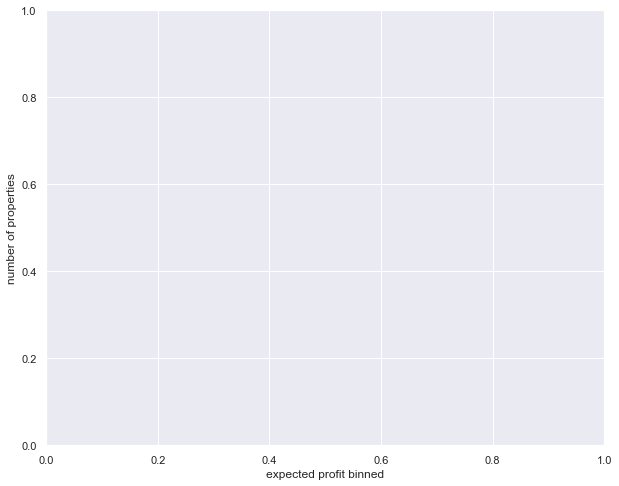

In [454]:
# comparision plot
comparision, ax1 = plt.subplots()

ax1.set_xlabel('expected profit binned')
ax1.set_ylabel('number of properties')
ax1.displot(a1['expected_profit_binned'], a1['properties'])
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('expected profit')  # we already handled the x-label with ax1
ax2.histplot(a1['expected_profit_binned'], a1['expected_profit'])
ax2.tick_params(axis='y')

comparision.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [455]:
# filtering data for better plot visualization

aux2 = df4[df4['expected_profit']!=0][['id', 'expected_profit']].copy()

bin_groups = list(np.arange(0,305000,5000)) # maximum profit = 630,000.00
aux2['expected_profit_binned'] = pd.cut(aux2['expected_profit'], bins=bin_groups)

aux2.head()

,id,expected_profit,expected_profit_binned
0,5561000190,"131,250.00","(130000, 135000]"
4,5056500260,"132,000.00","(130000, 135000]"
5,3438501320,"88,500.00","(85000, 90000]"
6,1737320120,"141,000.00","(140000, 145000]"
7,7197300105,"165,000.00","(160000, 165000]"


In [456]:
a2 = ( aux2.groupby('expected_profit_binned').agg(properties      = ('id', 'count'),
                                                  expected_profit = ('expected_profit', 'sum')) ).reset_index()




a2.head()

,expected_profit_binned,properties,expected_profit
0,"(0, 5000]",0,0.00
1,"(5000, 10000]",0,0.00
2,"(10000, 15000]",0,0.00
3,"(15000, 20000]",0,0.00
4,"(20000, 25000]",2,"47,400.00"


In [457]:
a2.sort_values('properties', ascending=False).head()

,expected_profit_binned,properties,expected_profit
14,"(70000, 75000]",652,"47,533,093.50"
15,"(75000, 80000]",542,"42,085,093.50"
17,"(85000, 90000]",512,"44,989,732.50"
16,"(80000, 85000]",509,"41,938,583.10"
20,"(100000, 105000]",494,"50,809,767.30"


In [458]:
a2.sort_values('expected_profit', ascending=False).head()

,expected_profit_binned,properties,expected_profit
26,"(130000, 135000]",455,"60,389,562.90"
32,"(160000, 165000]",346,"56,425,349.10"
29,"(145000, 150000]",372,"55,081,720.50"
23,"(115000, 120000]",451,"53,225,628.60"
20,"(100000, 105000]",494,"50,809,767.30"


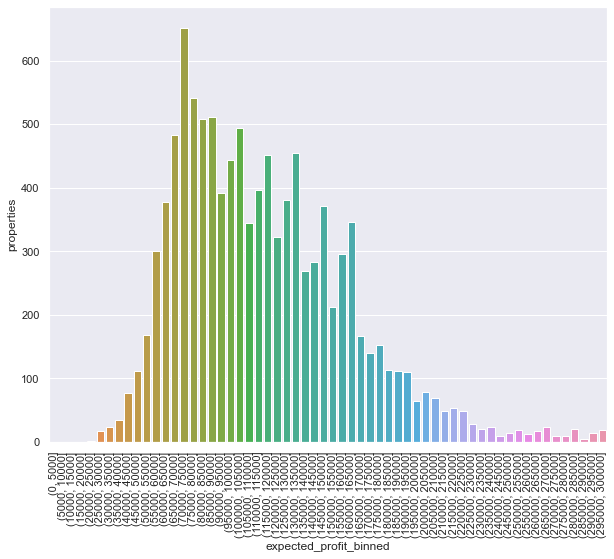

In [459]:
# id_distribution
sns.barplot(data=a2, x='expected_profit_binned', y='properties');
plt.xticks(rotation=90);

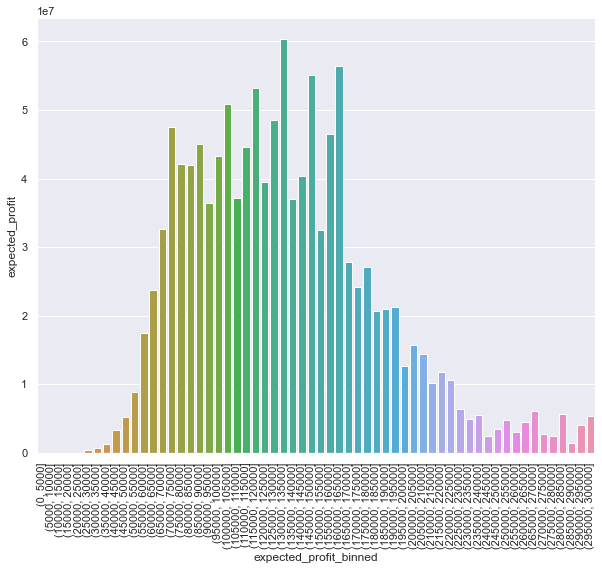

In [460]:
# profit_distribution
sns.barplot(data=a2, x='expected_profit_binned', y='expected_profit');
plt.xticks(rotation=90);

### Numerical Variables

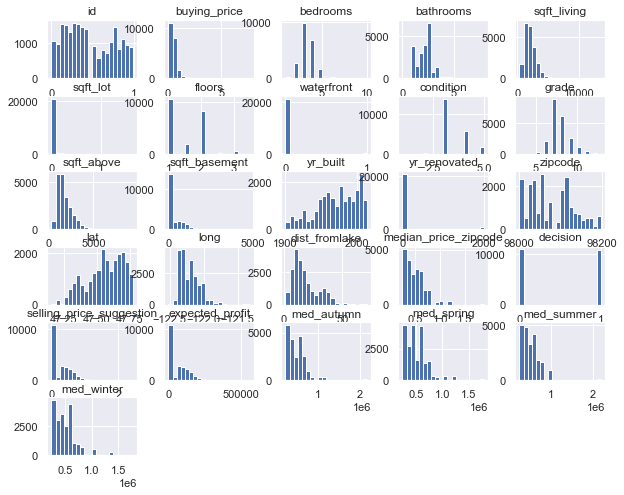

In [461]:
num_df4.hist(bins=20);
sns.set_theme(style ='darkgrid', font_scale=1)

### Categorical Variables

In [462]:
df41 = df4.copy()
print(cat_df4.dtypes)
cat_df4.head()

query             object
road              object
house_number      object
neighbourhood     object
city              object
county            object
state             object
season            object
season_to_sell    object
dtype: object


,query,road,house_number,neighbourhood,city,county,state,season,season_to_sell
0,"47.4635,-121.991",Southeast 154th Street,26069,NaN,NaN,King County,Washington,spring,autumn spring summer winter
1,"47.6833,-122.4",34th Avenue Northwest,7506,Sunset Hill,Seattle,King County,Washington,spring,
2,"47.5794,-122.025",Southeast 32nd Way,23601,NaN,NaN,King County,Washington,spring,
3,"47.515,-121.87",Southeast Terrace Street,35246,NaN,NaN,King County,Washington,spring,
4,"47.5443,-122.177",Southeast 65th Street,12201,NaN,Bellevue,King County,Washington,spring,autumn spring summer winter


In [463]:
cat_df4.isna().sum()

query                 0
road                219
house_number       1264
neighbourhood     14381
city              12557
county                0
state                 0
season                0
season_to_sell        0
dtype: int64

In [464]:
address = df41[['id', 'zipcode', 'road', 'house_number', 'neighbourhood', 'city', 'county', 'state']].copy()
address.head()

,id,zipcode,road,house_number,neighbourhood,city,county,state
0,5561000190,98027,Southeast 154th Street,26069,NaN,NaN,King County,Washington
1,472000620,98117,34th Avenue Northwest,7506,Sunset Hill,Seattle,King County,Washington
2,1024069009,98029,Southeast 32nd Way,23601,NaN,NaN,King County,Washington
3,7853361370,98065,Southeast Terrace Street,35246,NaN,NaN,King County,Washington
4,5056500260,98006,Southeast 65th Street,12201,NaN,Bellevue,King County,Washington


#### State

In [465]:
print('unique:', df41['state'].unique())
print('NA:', df41['state'].isna().sum())

unique: ['Washington']
NA: 0


#### County

In [466]:
address = df41[['id', 'zipcode', 'road', 'house_number', 'neighbourhood', 'city', 'county', 'state']].copy()

print('unique:', df41['county'].unique())
print('NA:', df41['county'].isna().sum())

unique: ['King County' 'Snohomish County' 'Pierce County']
NA: 0


In [467]:
df41[['id', 'county']].groupby('county').count().sort_values('id', ascending=False).reset_index()

,county,id
0,King County,21581
1,Pierce County,15
2,Snohomish County,2


✔️ The city of Seattle belongs to the **multi-counties**: King County and Snohomish County. https://wa.postcodebase.com/city/SEATTLE <br>
❓ Pierce County might be an error

##### **Investigating 'Pierce County'**

In [468]:
a = address[address['county']=='Pierce County'].sort_values('zipcode', ascending=True)
a

,id,zipcode,road,house_number,neighbourhood,city,county,state
2181,3275300040,98003,17th Avenue,99,NaN,NaN,Pierce County,Washington
6714,7153400010,98003,Alder Street,2286,NaN,NaN,Pierce County,Washington
6953,3275330120,98003,19th Avenue,63,NaN,NaN,Pierce County,Washington
9107,5409800120,98003,23rd Avenue South,77,NaN,NaN,Pierce County,Washington
12660,3275300440,98003,17th Avenue,77,NaN,NaN,Pierce County,Washington
12841,3275300050,98003,17th Avenue,95,NaN,NaN,Pierce County,Washington
15020,5409800110,98003,23rd Avenue South,77,NaN,NaN,Pierce County,Washington
16075,5409800140,98003,23rd Avenue South,81,NaN,NaN,Pierce County,Washington
3395,9413400165,98022,Lumpy Lane East,52435,NaN,NaN,Pierce County,Washington
12704,3518000180,98023,58th Avenue Northeast,35017,Northeast Tacoma,NaN,Pierce County,Washington


In [469]:
# checking 'zipcode' for 'Pierce County'
a['zipcode'].sort_values(ascending=True).unique()

array([98003, 98022, 98023, 98092], dtype=int64)

✔️ **98003**
Federal Way. County King County  https://wa.postcodebase.com/zipcode5/98003

✔️ **98022**
Zipcode 98022 is across counties/cities. City ENUMCLAW. Counties King County and Pierce County https://wa.postcodebase.com/zipcode5/98022

✔️ **98023**
Federal Way.  County King County https://wa.postcodebase.com/zipcode5/98023

✔️ **98092**
Zipcode 98092 is across counties/cities. City AUBURN. Counties King County and Pierce County https://wa.postcodebase.com/zipcode5/98092

#### City

In [470]:
address = df41[['id', 'zipcode', 'road', 'house_number', 'neighbourhood', 'city', 'county', 'state']].copy()

print('unique:', df41['city'].unique())
print('NA:', df41['city'].isna().sum())

unique: [nan 'Seattle' 'Bellevue' 'Shoreline' 'Kent' 'King County']
NA: 12557


In [471]:
df41[['id', 'city']].groupby('city').count().sort_values('id', ascending=False).reset_index()

,city,id
0,Seattle,7079
1,Bellevue,1325
2,Shoreline,630
3,Kent,5
4,King County,2


✔️ Seattle, Bellevue, Shoreline and Kent **belong** to King County https://kingcounty.gov/depts/health/codes/cities.aspx <br>
❌ King County is an error

##### Investigating 'King County' as 'city'

In [472]:
address[address['city']=='King County']

,id,zipcode,road,house_number,neighbourhood,city,county,state
11553,8075400570,98032,South 239th Street,3704,Midway,King County,King County,Washington
14475,8075400100,98032,41st Avenue South,23654,NaN,King County,King County,Washington


💡 Zipcode 98032 belongs **only** to Kent city https://wa.postcodebase.com/zipcode5/98032

##### **Inputing 'Kent' as city to 98032 'zipcode'**

In [473]:
# checking unique values for '98032' for 'city'
df41[df41['zipcode']==98032]['city'].unique()

array([nan, 'Kent', 'King County'], dtype=object)

In [474]:
# checking how many properties for '98032' are 'Kent' and 'King County' for 'city'
df41[df41['zipcode']==98032][['zipcode', 'city']].groupby('city').count().reset_index()

,city,zipcode
0,Kent,3
1,King County,2


In [475]:
# checking how many properties for '98032' are 'NaN' for 'city'
df41[df41['zipcode']==98032][['city']].isna().sum()[0]

120

In [476]:
# replacing 'city' values with 'Kent' for '98032' zipcode
df41['city'] = df41.apply(lambda x: 'Kent' if x['zipcode']==98032 else x['city'], axis=1)

df41[df41['zipcode']==98032][['zipcode', 'city']].groupby('city').count().reset_index()

,city,zipcode
0,Kent,125


##### Investigating 'city' NA

In [477]:
address = df41[['id', 'zipcode', 'road', 'house_number', 'neighbourhood', 'city', 'county', 'state']].copy()

print('NA:', df41['city'].isna().sum()) # city NA

NA: 12437


In [478]:
address[address['city'].isna()].head()

,id,zipcode,road,house_number,neighbourhood,city,county,state
0,5561000190,98027,Southeast 154th Street,26069,NaN,NaN,King County,Washington
2,1024069009,98029,Southeast 32nd Way,23601,NaN,NaN,King County,Washington
3,7853361370,98065,Southeast Terrace Street,35246,NaN,NaN,King County,Washington
6,1737320120,98011,Northeast 195th Street,8915,NaN,NaN,King County,Washington
7,7197300105,98052,170th Avenue Northeast,9105,NaN,NaN,King County,Washington


In [479]:
# counting how many 'city' and 'neighourhood' are 'NA'
print(address[(address['city'].isna()) & (address['neighbourhood'].isna())].shape[0], 'both city and neighbourhood are NA')
print(address[(address['city'].isna()) & (~address['neighbourhood'].isna())].shape[0], 'city NA and neighbourhood filled')

9111 both city and neighbourhood are NA
3326 city NA and neighbourhood filled


In [480]:
# counting how many 'zipcode's to NA 'city'
print("number of zipcodes with NA 'city':", address[address['city'].isna()][['zipcode', 'city']].groupby('zipcode').count().reset_index().shape[0])
address[address['city'].isna()][['zipcode', 'city']].groupby('zipcode').count().reset_index().sample(5)

number of zipcodes with NA 'city': 51


,zipcode,city
1,98002,0
30,98058,0
9,98014,0
18,98031,0
5,98007,0


#### Filling other 'NA' from address (if relevant, do it later)

In [481]:
address = df41[['id', 'zipcode', 'road', 'house_number', 'neighbourhood', 'city', 'county', 'state']].copy()

cat_df4 = df41.select_dtypes(exclude=['int64','float64','datetime64[ns]'])
cat_df4.isna().sum()

query                 0
road                219
house_number       1264
neighbourhood     14381
city              12437
county                0
state                 0
season                0
season_to_sell        0
dtype: int64

In [482]:
# filling NAs

# == before
# road               219
# house_number      1264
# neighbourhood    14381
# city             12557

# == after
# road               219
# house_number      1264
# neighbourhood    14381
# city             12437

In [483]:
address.head()

,id,zipcode,road,house_number,neighbourhood,city,county,state
0,5561000190,98027,Southeast 154th Street,26069,NaN,NaN,King County,Washington
1,472000620,98117,34th Avenue Northwest,7506,Sunset Hill,Seattle,King County,Washington
2,1024069009,98029,Southeast 32nd Way,23601,NaN,NaN,King County,Washington
3,7853361370,98065,Southeast Terrace Street,35246,NaN,NaN,King County,Washington
4,5056500260,98006,Southeast 65th Street,12201,NaN,Bellevue,King County,Washington


## <font color='red'> Bivariate Analysis

In [484]:
df42=df41.copy()

1. Properties that have water view are 50% more expensive.
2. Properties with basements have higher grade.
3. Properties with basements have bigger interior living space.
4. Properties with basements are 15% more expensive.
5. Properties built with basements decreased over the years.
6. Properties with 1 to 2 bathrooms are 20% more expensive than those with up to 1 bathroom.
7. Properties with 3 bedrooms are 25% more expensive than those which have 2 bedrooms.
8.  Properties with 2 floors are 15% more expensive than those with 1 floor.
9. Most properties (+50%) became available during summer/spring.
10. Properties available during summer/spring are 20% more expensive.
11. Most properties (+50%) are localized in a 15km radius from the lake.
12. Most of properties (+50%) that should be bought are in a 15km radius from the lake.
13. Properties selected to be bought that are localized in a 15km radius from lake correspond to more than 50% of expected profit.
14. Properties have bigger interior living space along construction year timeline.
15. Properties that were not renovated are 40% cheaper.

In [485]:
# hypothesis overview
tab = [ ['Hypothesis', 'Result', 'Relevance', 'Conclusion'],
        ['H01','False','High'  , 'Properties that have water view are more than 200% more expensive.'],
        ['H02','True' ,'Low'   , 'Properties with basements have a slightly lower grade.'],
        ['H03','True' ,'Low'   , 'Properties with basement have bigger interior living space on average.'],
        ['H04','False','High'  , 'Properties with basement are 27.84 % more expensive.'],
        ['H05','True' ,'High'  , 'Properties built with basements decreased after the 80s.'],
        ['H06','False','High'  , 'Properties with 1 to 2 bathrooms are 67.55 % more expensive than those with up to 1 bathroom.'],
        ['H07','False','Low'   , 'Properties with 3 bedrooms are 16.10% more expensive than those which have 2 bedrooms.'],
        ['H08','False','Low'   , 'Properties with 2 floors are 29.25 % more expensive than those with 1 floor.'],
        ['H09','True' ,'High'  , 'Almost 60% of the properties became available during summer/spring.'],
        ['H10','False','Low'   , 'Properties available during summer/spring are 4,5% more expensive.'],
        ['H11','True' ,'High'  , '50% of the properties are localized in a 15km radius from the lake.'],
        ['H12','True' ,'High'  , '50% of properties that should be bought are in a 15km radius from the lake.'],
        ['H13','True' ,'High'  , 'Properties selected to be bought in a 15km radius from lake correspond to almost 60% of expected profit.'],
        ['H14','True' ,'High'  , 'Properties have bigger interior living space along construction year timeline.'],
        ['H15','True' ,'High'  , 'Properties that were not renovated are 43.17% cheaper.'],
        
      ]

print(tabulate(tab, headers='firstrow', colalign=['center','center','center','left']))

 Hypothesis    Result    Relevance   Conclusion
------------  --------  -----------  --------------------------------------------------------------------------------------------------------
    H01        False       High      Properties that have water view are more than 200% more expensive.
    H02         True        Low      Properties with basements have a slightly lower grade.
    H03         True        Low      Properties with basement have bigger interior living space on average.
    H04        False       High      Properties with basement are 27.84 % more expensive.
    H05         True       High      Properties built with basements decreased after the 80s.
    H06        False       High      Properties with 1 to 2 bathrooms are 67.55 % more expensive than those with up to 1 bathroom.
    H07        False        Low      Properties with 3 bedrooms are 16.10% more expensive than those which have 2 bedrooms.
    H08        False        Low      Properties with 2 floors are 2

### Properties that have water view are 50% more expensive.
**False:** Properties that have water view are more than 200% more expensive.

In [486]:
a = df42[['waterfront', 'buying_price']].groupby('waterfront').mean().reset_index()
print(a)

hasnot_waterfront = a.iloc[0,1]
has_waterfront = a.iloc[1,1]

percentage = abs( ((has_waterfront - hasnot_waterfront) / hasnot_waterfront)*100 )
print('\nProperties that have water view are', '{:,.2f}'.format(percentage),'% more expensive')

   waterfront  buying_price
0           0    532,755.38
1           1  1,661,876.02

Properties that have water view are 211.94 % more expensive


### Properties with basements have higher grade.
**True:** Properties with basements have a *slightly* lower grade.

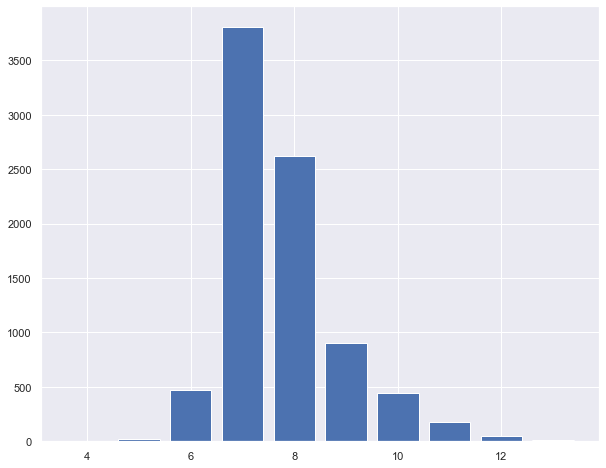

In [487]:
# properties with basement

a = df42[df42['sqft_basement']!=0][['id', 'grade', 'sqft_basement']].copy()
#print(a.head(), '\n')
#print(a.shape)

has_basement = a[['id','grade']].groupby('grade').count().reset_index()
plt.bar(has_basement['grade'], has_basement['id'])
plt.rcParams['figure.figsize'] = (10,8)

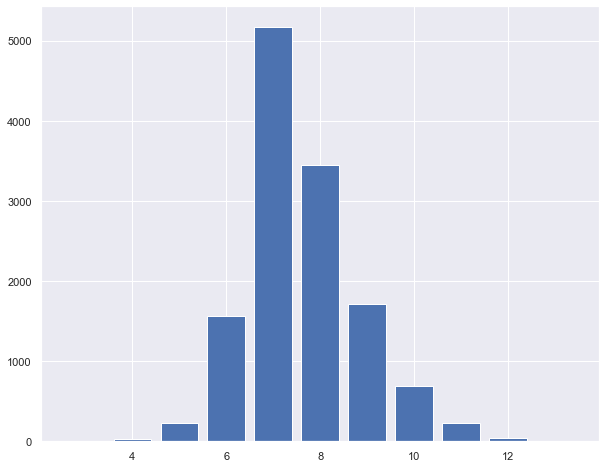

In [488]:
# properties without basement

a = df42[df42['sqft_basement']==0][['id', 'grade', 'sqft_basement']].copy()
#print(a.head(), '\n')
#print(a.shape)

hasnot_basement = a[['id','grade']].groupby('grade').count().reset_index()
plt.bar(hasnot_basement['grade'], hasnot_basement['id'])
plt.rcParams['figure.figsize'] = (10,8)

In [489]:
# weighted average grade
w_avg_has = np.average(np.array(has_basement['grade']), weights=np.array(has_basement['id']))
print('Weighted average grade for properties with basement: {:,.2f}'.format(w_avg_has))

w_avg_hasnot = np.average(np.array(hasnot_basement['grade']), weights=np.array(hasnot_basement['id']))
print('Weighted average grade for properties without basement: {:,.2f}'.format(w_avg_hasnot))

print('\nSmall difference, not relevant.')

Weighted average grade for properties with basement: 7.73
Weighted average grade for properties without basement: 7.61

Small difference, not relevant.


### Properties with basements have bigger interior living space.
**True:** Properties with basement have bigger interior living space on average.

In [490]:
has_basement = df42[df42['sqft_basement']!=0][['sqft_living']].mean()
has_basement

sqft_living   2,313.47
dtype: float64

In [491]:
hasnot_basement = df42[df42['sqft_basement']==0][['sqft_living']].mean()
hasnot_basement

sqft_living   1,929.10
dtype: float64

### Properties with basements are 15% more expensive.
**False:** Properties with basement are 27.84 % more expensive.

In [492]:
has_basement = df42[df42['sqft_basement']!=0][['buying_price']].mean()[0]
print('Average price of properties with basement: {:,.2f}'.format(has_basement))

hasnot_basement = df42[df42['sqft_basement']==0][['buying_price']].mean()[0]
print('Average price of properties without basement: {:,.2f}'.format(hasnot_basement))

percentage = abs( ((has_basement - hasnot_basement) / hasnot_basement)*100 )
print('Properties with basement are', '{:,.2f}'.format(percentage),'% more expensive.')

Average price of properties with basement: 623,736.19
Average price of properties without basement: 487,920.05
Properties with basement are 27.84 % more expensive.


### Properties built with basements decreased over the years.
**True:** Properties built with basements decreased after the 80s.

In [493]:
p = df42[['id', 'yr_built']].groupby('yr_built').count().reset_index() 
p.head() # number of properties

,yr_built,id
0,1900,87
1,1901,29
2,1902,27
3,1903,46
4,1904,45


In [494]:
b = df42[df42['sqft_basement']!=0][['sqft_basement','yr_built']].groupby('yr_built').count().reset_index()
b.head() # properties with basement

,yr_built,sqft_basement
0,1900,29
1,1901,11
2,1902,5
3,1903,10
4,1904,21


In [495]:
comparision = pd.merge(p, b, on='yr_built', how='left').rename(columns={'id': 'properties', 'sqft_basement': 'has_b'})
comparision['hasnot_b'] = comparision['properties'] - comparision['has_b']
comparision.sample()

,yr_built,properties,has_b,hasnot_b
1,1901,29,11,18


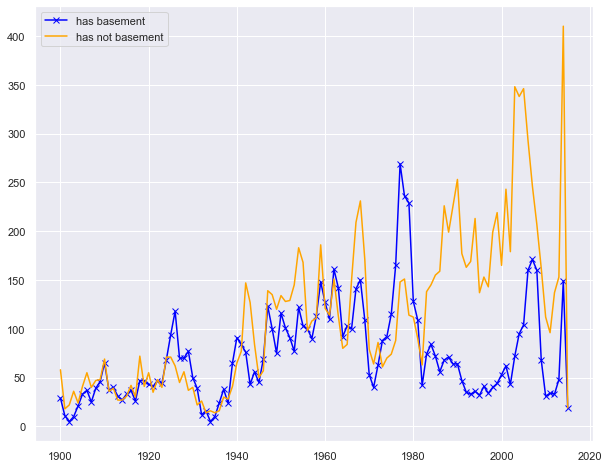

In [496]:
plt.plot(comparision['yr_built'], comparision['has_b'], color='blue', marker='x', label='has basement')
plt.plot(comparision['yr_built'], comparision['hasnot_b'], color='orange', label='has not basement')
plt.legend()
plt.show()

### Properties with 1 to 2 bathrooms are 20% more expensive than those with up to 1 bathroom.
**False:** Properties with 1 to 2 bathrooms are 67.55 % more expensive than those with up to 1 bathroom.

In [497]:
a = df42[['id', 'bathrooms', 'buying_price']].copy()
a.head()

b = (a.groupby('bathrooms').agg(properties = ('id', 'count'),
                                avg_price  = ('buying_price', 'mean'))).reset_index()

b1 = b[b['bathrooms']<=1] # up to 1 bathroom
b1_mean = b1['avg_price'].mean()
print('Average price of properties with up to 1 bathroom: {:,.2f}'.format(b1_mean))

b2 = b[(b['bathrooms']>1) & (b['bathrooms']<=2)] # 1 to 2 bathrooms
b2_mean = b2['avg_price'].mean()
print('Average price of properties with 1 to 2 bathroom: {:,.2f}'.format(b2_mean))

percentage = abs( ((b2_mean - b1_mean) / b1_mean)*100 )
print('Properties with 1 to 2 bathrooms are', '{:,.2f}'.format(percentage),'% more expensive.')

Average price of properties with up to 1 bathroom: 290,641.99
Average price of properties with 1 to 2 bathroom: 486,960.05
Properties with 1 to 2 bathrooms are 67.55 % more expensive.


### Properties with 3 bedrooms are  25% more expensive than those which have 2 bedrooms.
**False:** Properties with 3 bedrooms are 16.10% more expensive than those which have 2 bedrooms.

In [498]:
a = df42[['id', 'bedrooms', 'buying_price']].copy()
a.head()

b = (a.groupby('bedrooms').agg(properties = ('id', 'count'),
                               avg_price  = ('buying_price', 'mean'))).reset_index()

b2 = b.iloc[1,2]
b3 = b.iloc[2,2]

print('Average price of properties with 2 bedrooms:', b2)
print('Average price of properties with 3 bedrooms:', b3)

percentage = abs( ((b3 - b2) / b2)*100 )
print('Properties with 3 bedrooms are ', '{:,.2f}'.format(percentage),'% more expensive than those which have 2 bedrooms.')

Average price of properties with 2 bedrooms: 402666.2144927536
Average price of properties with 3 bedrooms: 467491.715492671
Properties with 3 bedrooms are  16.10 % more expensive than those which have 2 bedrooms.


### Properties with 2 floors are 15% more expensive than those with 1 floor. 
**False:** Properties with 2 floors are 29.25 % more expensive than those with 1 floor.

In [499]:
a = df42[['id', 'floors', 'buying_price']].copy()
a.head()

b = (a.groupby('floors').agg(properties = ('id', 'count'),
                             avg_price  = ('buying_price', 'mean'))).reset_index()
b.head()

f1 = b[b['floors']<2] # less than 2 floors
f1_mean = f1['avg_price'].mean()
print('Average price of properties with less than 2 floors: {:,.2f}'.format(f1_mean))

f2= b[b['floors']==2] # with 2 floors
f2_mean = f2['avg_price'].mean()
print('Average price of properties with 2 floors: {:,.2f}'.format(f2_mean))

percentage = abs( ((f2_mean - f1_mean) / f1_mean)*100 )
print('Properties with 2 floors are {:,.2f}'.format(percentage),'% more expensive than those with 1 floor.')

Average price of properties with less than 2 floors: 502,454.56
Average price of properties with 2 floors: 649,419.53
Properties with 2 floors are 29.25 % more expensive than those with 1 floor.


### Most properties (+50%) became available during summer/spring.
**True:** Almost 60% of the properties became available during summer/spring.

In [500]:
a = df42[['season', 'id']].copy()

a['SS_AW'] = a.apply(lambda x: 'SS' if x['season']=='summer' 
                          else 'SS' if x['season']=='spring' 
                          else 'AW', axis=1)


b = a[['SS_AW', 'id']].groupby('SS_AW').count().sort_values('id', ascending=False).reset_index()
b['cumultive_%'] = b['id'].cumsum()/b['id'].sum()*100
b.head()

,SS_AW,id,cumultive_%
0,SS,12916,59.80
1,AW,8682,100.00


### Properties available during summer/spring are 20% more expensive.
**False:** Properties available during summer/spring are 4,5% more expensive.

In [501]:
a = df42[['id', 'season', 'buying_price']].copy()

a['SS_AW'] = a.apply(lambda x: 'SS' if x['season']=='summer' 
                          else 'SS' if x['season']=='spring' 
                          else 'AW', axis=1)

b = (a.groupby('SS_AW').agg(properties   = ('id', 'count'),
                            price_min    = ('buying_price', 'min'),
                            price_max    = ('buying_price', 'max'),
                            price_median = ('buying_price', 'median'),
                            price_mean   = ('buying_price', 'mean')) ).sort_values('price_mean', ascending=False).reset_index()

SS_mean = b.iloc[0,5]
AW_mean = b.iloc[1,5]

percentage = abs( ((SS_mean - AW_mean) / AW_mean)*100 )
print('Properties with available during Summer/Spring are', '{:,.2f}'.format(percentage),'% more expensive.')

b.head()

Properties with available during Summer/Spring are 4.50 % more expensive.


,SS_AW,properties,price_min,price_max,price_median,price_mean
0,SS,12916,"78,000.00","7,062,500.00","462,604.00","550,812.02"
1,AW,8682,"75,000.00","7,700,000.00","437,609.00","527,091.59"


### Most properties (+50%) are localized in a 15km radius from the lake.
**True:** 50% of the properties are localized in a 15km radius from the lake.

In [502]:
a = df4[['id', 'dist_fromlake']].copy()

bin_groups = list(np.arange(0,90,15)) # maximum dist =~ 71
a['dist_fromlake_binned'] = pd.cut(a['dist_fromlake'], bins=bin_groups)

b = a[['dist_fromlake_binned', 'id']].groupby('dist_fromlake_binned').count().sort_values('id', ascending=False).reset_index()

b['cumultive_%'] = b['id'].cumsum()/b['id'].sum()*100

b.head()

,dist_fromlake_binned,id,cumultive_%
0,"(0, 15]",10979,50.83
1,"(15, 30]",6658,81.66
2,"(30, 45]",3692,98.75
3,"(45, 60]",252,99.92
4,"(60, 75]",17,100.00


### Most of properties (+50%) that should be bought are in a 15km radius from the lake.
**True:** 50% of properties that should be bought are in a 15km radius from the lake.

In [503]:
a = df4[df4['decision']!=0][['id', 'dist_fromlake', 'decision']].copy()

bin_groups = list(np.arange(0,90,15)) # maximum dist =~ 71 km
a['dist_fromlake_binned'] = pd.cut(a['dist_fromlake'], bins=bin_groups)
a.head()

b = a[['dist_fromlake_binned', 'decision']].groupby('dist_fromlake_binned').count().sort_values('decision', ascending=False).reset_index()

b['cumultive_%']=b['decision'].cumsum()/b['decision'].sum()*100

b.head()

,dist_fromlake_binned,decision,cumultive_%
0,"(0, 15]",5328,49.76
1,"(15, 30]",3391,81.43
2,"(30, 45]",1852,98.73
3,"(45, 60]",121,99.86
4,"(60, 75]",15,100.00


### <font color = 'red'> Grafico 80% property zone Properties selected to be bought that are localized in a 15km radius from lake correspond to more than 50% of expected profit.
**True:** Properties selected to be bought in a 15km radius from lake correspond to almost 60% of expected profit.

In [504]:
a = df4[df4['expected_profit']!=0][['id', 'dist_fromlake', 'expected_profit']].copy()

bin_groups = list(np.arange(0,90,15)) # maximum dist =~ 71
a['dist_fromlake_binned'] = pd.cut(a['dist_fromlake'], bins=bin_groups)
a.head()

b = ( a[['dist_fromlake_binned', 'expected_profit']].groupby('dist_fromlake_binned')
                                                    .agg(profit_min    = ('expected_profit', 'min'),
                                                         profit_max    = ('expected_profit', 'max'),
                                                         profit_median = ('expected_profit', 'median'),
                                                         profit_mean   = ('expected_profit', 'mean'),
                                                         profit_sum    = ('expected_profit', 'sum'),) ).reset_index()

b['cumulative_%']=b['profit_sum'].cumsum()/b['profit_sum'].sum()*100

b['max_dist'] = [15, 30, 45, 60, 75]

b.head()

,dist_fromlake_binned,profit_min,profit_max,profit_median,profit_mean,profit_sum,cumulative_%,max_dist
0,"(0, 15]","27,000.00","564,000.00","130,800.00","138,785.31","739,448,133.60",59.20,15
1,"(15, 30]","24,900.00","222,000.00","96,000.00","105,295.36","357,056,558.10",87.78,30
2,"(30, 45]","26,700.00","150,000.00","74,700.00","77,317.01","143,191,103.40",99.25,45
3,"(45, 60]","22,500.00","113,700.00","70,500.00","69,607.67","8,422,527.90",99.92,60
4,"(60, 75]","40,200.00","124,500.00","50,100.00","66,540.00","998,100.00",100.00,75


(0.0, 110.0)

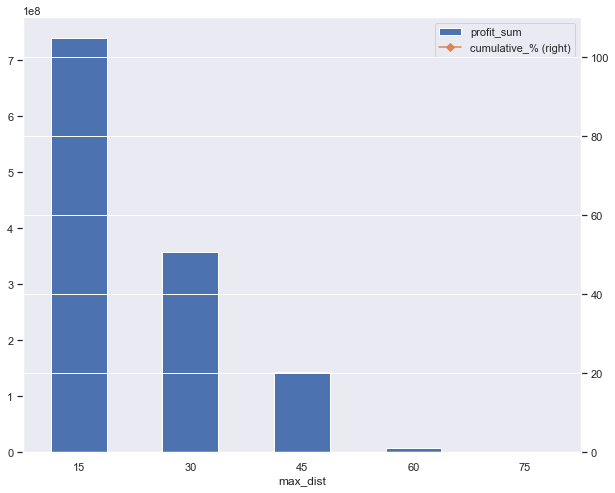

In [505]:
# 80% property zone


fig, axes = plt.subplots()
ax1 = b.plot(use_index=True, x='max_dist', y='profit_sum',  kind='bar', ax=axes)
ax2 = b.plot(use_index=True, x='max_dist', y='cumulative_%', marker='D', color="C1", kind='line', ax=axes, secondary_y=True)
ax2.set_ylim([0,110])

# fig, axes = plt.subplots()
# ax1 = a.plot(use_index=True, x='neighbourhood', y='id',  kind='bar', ax=axes)
# ax2 = a.plot(use_index=True, x='neighbourhood', y='cum_percentage', marker='D', color="C1", kind='line', ax=axes, secondary_y=True)
# ax2.set_ylim([0,110])

### Properties have bigger interior living space along construction year timeline.
**True:** Properties have bigger interior living space along construction year timeline.

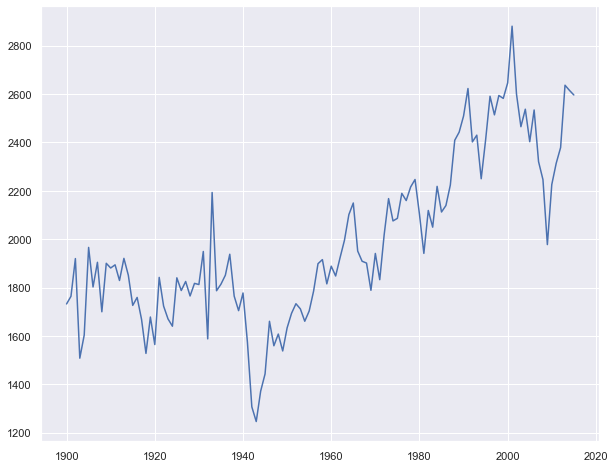

In [506]:
a = df42[['sqft_living', 'yr_built']].copy()

b = a.groupby('yr_built').mean().reset_index()

plt.plot(b['yr_built'], b['sqft_living'])
plt.show()

### Properties that were not renovated are 40% cheaper.
**True:** Properties that were not renovated are 43.17% cheaper.

In [507]:
a = df42[['buying_price', 'yr_renovated']].copy()

a['was_renovated'] = a.apply(lambda x: 0 if x['yr_renovated']==0 else 1, axis=1)

b = a[['was_renovated', 'buying_price']].groupby('was_renovated').mean().reset_index()

wasnot_renovated = b.iloc[0,1]
was_renovated = b.iloc[1,1]

print('Average price of properties that were not renovated: {:,.2f}'.format(wasnot_renovated))
print('Average price of properties that were renovated: {:,.2f}'.format(was_renovated))

percentage = abs( ((was_renovated - wasnot_renovated) / wasnot_renovated)*100 )
print('Properties that were not renovated are {:,.2f}'.format(percentage),'% cheaper.')

Average price of properties that were not renovated: 531,576.85
Average price of properties that were renovated: 761,040.56
Properties that were not renovated are 43.17 % cheaper.


### <font color = 'red'> Delete - Other hypothesis

In [508]:
##  =========== Properties that were built in the last 5 years are cheaper than properties that were renovated in the last 5 years.

# print('Dates properties became available')
# print('min', df42['date'].min(), '\nmax', df42['date'].max())

# ##

# print('Maximum "yr_renovated":', df42['yr_renovated'].max(), '\nMinus 5 years":', df42['yr_renovated'].max() - 5)
# print('\nMaximum "yr_built":', df42['yr_built'].max(), '\nMinus 5 years":', df42['yr_built'].max() - 5)

# ## 

# renovated = df42[   (df42['yr_renovated'] >= df42['yr_renovated'].max() - 5) 
#                   & (df42['yr_renovated'] <  df42['yr_renovated'].max())     ][['id','yr_renovated', 'price']]

# built = df42[   (df42['yr_built'] >= df42['yr_built'].max() - 5)
#               & (df42['yr_built'] <  df42['yr_built'].max())     ][['id','yr_built', 'price']]

# ## 

# a = ( renovated.groupby('yr_renovated').agg(properties_r = ('id', 'count'),
#                                             mean_price_r = ('price', 'mean')).reset_index().rename(columns={'yr_renovated':'year'}) )

# a

# ## 

# b = ( built.groupby('yr_built').agg(properties_b = ('id', 'count'),
#                                     mean_price_b = ('price', 'mean')).reset_index().rename(columns={'yr_built':'year'}) )

# b

# ## 

# c = pd.merge(a, b, on='year', how='left')
# c

# c['price_diff'] = c['mean_price_r'] - c['mean_price_b']
# c

# ##

# plot(c['year'], c['mean_price_r'])
# plot(c['year'], c['mean_price_b'])
# plot.show()

# ## ==== timeline

# a = ( df42[df42['yr_renovated']!=0].groupby('yr_renovated').agg(properties_r = ('id', 'count'),
#                                        mean_price_r = ('price', 'mean')).reset_index().rename(columns={'yr_renovated':'year'}) )

# b = ( df42.groupby('yr_built').agg(properties_b = ('id', 'count'),
#                                    mean_price_b = ('price', 'mean')).reset_index().rename(columns={'yr_built':'year'}) )

# c = pd.merge(a, b, on='year', how='left')
# c

# plot(c['year'], c['mean_price_r'], color='green')
# plot(c['year'], c['mean_price_b'])
# plot.show()

## Multivariate Analysis

In [509]:
df43=df42.copy()

### <font color=red>Numerical Attributes

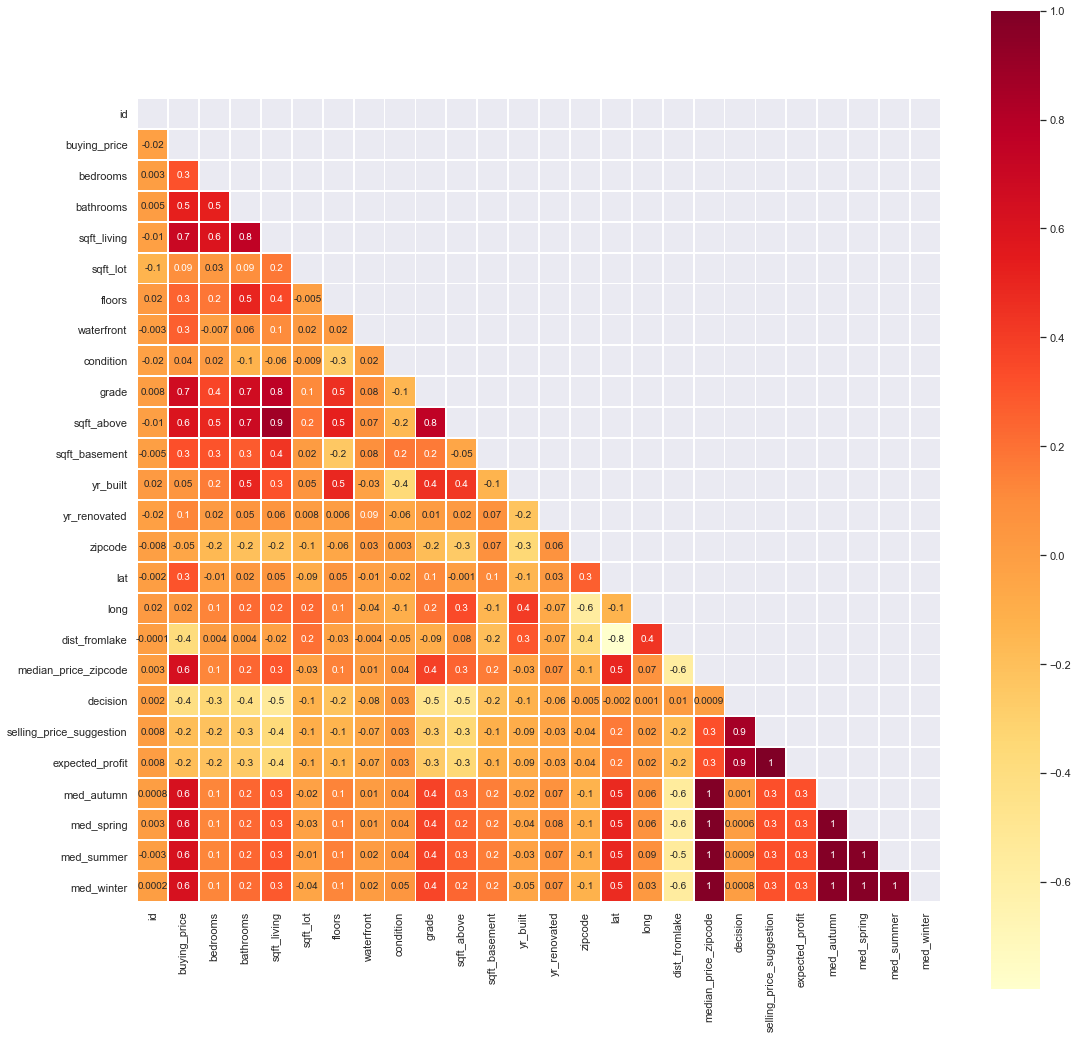

In [510]:
correlation = num_df4.corr(method='pearson')

corr_mask = np.triu(correlation)

plt.figure(figsize=(18,18))
sns.heatmap(correlation, 
            cmap='YlOrRd', 
            annot=True, 
            annot_kws={'fontsize':'small'},
            fmt='.1g',
            linewidths=0.8, 
            square=True, 
            mask=corr_mask);

In [511]:
correlation.where( ((correlation <= -0.5) | (correlation >=0.5 )) & (correlation != 1) , other='')

,id,buying_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,dist_fromlake,median_price_zipcode,decision,selling_price_suggestion,expected_profit,med_autumn,med_spring,med_summer,med_winter
id,,,,,,,,,,,,,,,,,,,,,,,,,,
buying_price,,,,0.52,0.7,,,,,0.67,0.6,,,,,,,,0.63,,,,0.63,0.63,0.62,0.62
bedrooms,,,,0.53,0.59,,,,,,,,,,,,,,,,,,,,,
bathrooms,,0.52,0.53,,0.76,,0.5,,,0.67,0.69,,0.51,,,,,,,,,,,,,
sqft_living,,0.7,0.59,0.76,,,,,,0.76,0.88,,,,,,,,,-0.54,,,,,,
sqft_lot,,,,,,,,,,,,,,,,,,,,,,,,,,
floors,,,,0.5,,,,,,,0.52,,,,,,,,,,,,,,,
waterfront,,,,,,,,,,,,,,,,,,,,,,,,,,
condition,,,,,,,,,,,,,,,,,,,,,,,,,,
grade,,0.67,,0.67,0.76,,,,,,0.76,,,,,,,,,,,,,,,


### Categorical Attributes

In [512]:
print(cat_df4.shape)
cat_df4.head()

(21598, 9)


,query,road,house_number,neighbourhood,city,county,state,season,season_to_sell
0,"47.4635,-121.991",Southeast 154th Street,26069,NaN,NaN,King County,Washington,spring,autumn spring summer winter
1,"47.6833,-122.4",34th Avenue Northwest,7506,Sunset Hill,Seattle,King County,Washington,spring,
2,"47.5794,-122.025",Southeast 32nd Way,23601,NaN,NaN,King County,Washington,spring,
3,"47.515,-121.87",Southeast Terrace Street,35246,NaN,NaN,King County,Washington,spring,
4,"47.5443,-122.177",Southeast 65th Street,12201,NaN,Bellevue,King County,Washington,spring,autumn spring summer winter


# <font color ='red'>Conclusion and Visualization

In [513]:
df5=df43.copy()

## Mainly Insights

**H05 - Properties built with basements decreased over the years.**<br>
Properties built with basements decreased after the 80s.

**H10 - Properties available during summer/spring are 20% more expensive.**<br>
Almost 60% of the properties became available during summer/spring.

**H12 - Most of properties (+50%) that should be bought are in a 15km radius from the lake.**<br>
50% of properties that should be bought are in a 15km radius from the lake.

**H13 - Properties selected to be bought that are localized in a 15km radius from lake correspond to more than 50% of expected profit.** <br>
Properties selected to be bought in a 15km radius from lake correspond to 60% of expected profit.

###### All hypothesis

**Hypothesis**

1. Properties that have water view are 50% more expensive.
2. Properties with basements have higher grade.
3. Properties with basements have bigger interior living space.
4. Properties with basements are 15% more expensive.
5. Properties built with basements decreased over the years.
6. Properties with 1 to 2 bathrooms are 20% more expensive than those with up to 1 bathroom.
7. Properties with 3 bedrooms are 25% more expensive than those which have 2 bedrooms.
8.  Properties with 2 floors are 15% more expensive than those with 1 floor.
9. Most properties (+50%) became available during summer/spring.
10. Properties available during summer/spring are 20% more expensive.
11. Most properties (+50%) are localized in a 15km radius from the lake.
12. Most of properties (+50%) that should be bought are in a 15km radius from the lake.
13. Properties selected to be bought that are localized in a 15km radius from lake correspond to more than 50% of expected profit.
14. Properties have bigger interior living space along construction year timeline.
15. Properties that were not renovated are 40% cheaper.
<br><br>

**Conclusions**


    Hypothesis  Result    Relevance   Conclusion
------------  --------  -----------  -------------------------------------------------------------------------------------------------
    H01        False       High      Properties that have water view are more than 200% more expensive.
    H02         True        Low      Properties with basements have a slightly lower grade.
    H03         True        Low      Properties with basement have bigger interior living space on average.
    H04        False       High      Properties with basement are 27.84 % more expensive.
    H05         True       High      Properties built with basements decreased after the 80s.
    H06        False       High      Properties with 1 to 2 bathrooms are 67.55 % more expensive than those with up to 1 bathroom.
    H07        False        Low      Properties with 3 bedrooms are 16.10% more expensive than those which have 2 bedrooms.
    H08        False        Low      Properties with 2 floors are 29.25 % more expensive than those with 1 floor.
    H09         True       High      Almost 60% of the properties became available during summer/spring.
    H10        False        Low      Properties available during summer/spring are 4,5% more expensive.
    H11         True       High      50% of the properties are localized in a 15km radius from the lake.
    H12         True       High      50% of properties that should be bought are in a 15km radius from the lake.
    H13         True       High      Properties selected to be bought in a 15km radius from lake correspond to 60% of expected profit.
    H14         True       High      Properties have bigger interior living space along construction year timeline.
    H15         True       High      Properties that were not renovated are 43.17% cheaper.

## Decision Overview

In [515]:
decision = df5[df5['decision']!=0]
decision[['id', 'condition', 'zipcode', 'median_price_zipcode', 'buying_price', 'selling_price_suggestion', 'expected_profit', 'season_to_sell' ]].sample(10)

,id,condition,zipcode,median_price_zipcode,buying_price,selling_price_suggestion,expected_profit,season_to_sell
6871,3818700123,3,98028,"445,000.00","390,000.00","507,000.00","117,000.00",autumn spring summer winter
13897,1453602310,3,98125,"425,000.00","303,000.00","393,900.00","90,900.00",autumn spring summer winter
7638,9543000896,4,98001,"260,000.00","237,000.00","308,100.00","71,100.00",autumn spring summer winter
8020,3359500755,3,98115,"570,000.00","544,500.00","707,850.00","163,350.00",autumn spring summer winter
11583,3025300225,4,98039,"1,892,500.00","1,450,000.00","1,885,000.00","435,000.00",autumn spring summer winter
2071,3306200010,3,98023,"268,500.00","210,000.00","273,000.00","63,000.00",autumn spring summer winter
14613,7201800090,3,98052,"615,000.00","405,000.00","526,500.00","121,500.00",autumn spring summer winter
4161,1862900160,4,98031,"288,400.00","265,900.00","345,670.00","79,770.00",autumn spring summer winter
16429,259600050,3,98008,"545,000.00","458,500.00","596,050.00","137,550.00",autumn spring summer winter
8737,446000020,3,98115,"570,000.00","439,500.00","571,350.00","131,850.00",autumn spring summer winter


In [592]:
# === transforming features

df5['to_buy'] = df5['decision'].apply( lambda x: 'to buy' if x==1 else 'not to buy')



# === adding interactive buttons

set_style = {'description_width': 'initial'} # widget button description size

# Decision wether to buy or not
b_to_buy = widgets.Dropdown(options=df5['to_buy'].unique().tolist(), 
                            value='to buy', 
                            description = 'Buying Decision:',
                            style = set_style )

# Maximum Price
b_price_limit = widgets.IntSlider(value = df5['buying_price'].mean(),
                                  min   = df5['buying_price'].min(),
                                  max   = df5['buying_price'].max(),
                                  step  = 100,
                                  description = 'Maximum Buying Price:',
                                  style = set_style)
 
# Distance from the center of the lake
b_dist_fromlake = widgets.IntSlider(value = 10,
                                    min   = df5['dist_fromlake'].min(),
                                    max   = df5['dist_fromlake'].max(),
                                    step  = 1,
                                    description = 'Distance from lake:',
                                    style = set_style)

In [593]:
def set_map (df, c_to_buy, c_price_limit, c_dist_fromlake): # dataframe and buttons caller
    
    # defining map dataset with conditions (buttons caller) and columns from original dataset
    # dfmap = df2[ () & () ] [[   ]] // conditions (buttons caller) and columns from dataset
    dfmap = df5[ (df5['to_buy']        == c_to_buy)      & 
                 (df5['buying_price']  <= c_price_limit) & 
                 (df5['dist_fromlake'] <= c_dist_fromlake) ] [['id', 'buying_price', 'lat', 'long', 'dist_fromlake',
                                                               'decision', 'selling_price_suggestion', 'expected_profit', 'condition' ]]
    
    
    map_plot = px.scatter_mapbox(dfmap, lat='lat', lon='long', color='expected_profit',
                                 color_continuous_scale=px.colors.sequential.Rainbow,
                                 size='buying_price', zoom=10, size_max=15, 
                                 hover_data=['dist_fromlake', 'selling_price_suggestion', 'expected_profit', 'condition'])
     
    
    map_plot.update_layout(mapbox_style = 'open-street-map', height = 600, 
                           margin={'r':0, 't':0, 'l':0,'b':0})
    map_plot.show()

In [594]:
widgets.interactive(set_map, df=fixed(df5), 
                    c_to_buy = b_to_buy,
                    c_price_limit = b_price_limit,
                    c_dist_fromlake = b_dist_fromlake)

interactive(children=(Dropdown(description='Buying Decision:', options=('to buy', 'not to buy'), style=Descrip…

## Expected Profit Overview

In [601]:
# print(decision['expected_profit'].sum(),'{:,.2f}.format()')
print('The overall expected profit is U$$ {:,.2f}'.format(decision['expected_profit'].sum()))

The overall expected profit is U$$ 1,249,116,423.00


# Saving dataframes

In [605]:
df6=df5.copy()

df5.to_csv('../datasets/processed/house_rocket.csv')

decision.to_csv('../datasets/processed/decision.csv')